# Logistic Regression on Synthetic Blobs
Train and visualize a binary classifier on a simple 2D dataset to show the end-to-end pipeline: data generation, training loop, loss curve, and accuracy.


In [1]:
import os, sys
sys.path.append(os.path.abspath(".."))
import numpy as np
import matplotlib.pyplot as plt
from src.model import LogisticRegression


In [2]:
# Create synthetic 2D blobs
np.random.seed(42)
n_samples = 150
class_0 = np.random.normal(loc=[0, 0], scale=0.5, size=(n_samples, 2))
class_1 = np.random.normal(loc=[2, 2], scale=0.5, size=(n_samples, 2))

X = np.vstack([class_0, class_1])
y = np.vstack([np.zeros((n_samples, 1)), np.ones((n_samples, 1))])

# Shuffle to mix classes
idx = np.random.permutation(len(X))
X, y = X[idx], y[idx]

print(f"X shape: {X.shape}, y shape: {y.shape}")


X shape: (300, 2), y shape: (300, 1)


In [3]:
# Initialize model
model = LogisticRegression(n_features=2, lr=0.05, reg_lambda=0.001)
print(f"Initial weights: {model.weights.flatten()} | bias: {model.bias}")


Initial weights: [1.28453303 0.6890362 ] | bias: 0.0


In [4]:
# Training loop
epochs = 200
losses = []

for epoch in range(epochs):
    _, y_hat = model.forward(X)
    loss = model.loss(y, y_hat)
    dW, dB = model.backward(X, y, y_hat)
    model.update(dW, dB)
    losses.append(loss)
    if epoch % 20 == 0:
        print(f"Epoch {epoch:03d} | Loss: {loss:.4f}")


Epoch 000 | Loss: 0.3848
Epoch 020 | Loss: 0.3352
Epoch 040 | Loss: 0.2966
Epoch 060 | Loss: 0.2662
Epoch 080 | Loss: 0.2421
Epoch 100 | Loss: 0.2224
Epoch 120 | Loss: 0.2062
Epoch 140 | Loss: 0.1925
Epoch 160 | Loss: 0.1808
Epoch 180 | Loss: 0.1706


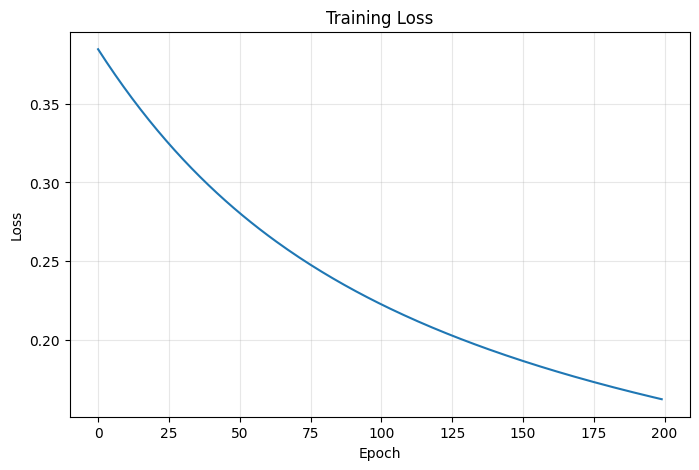

In [5]:
# Plot loss curve
plt.figure(figsize=(8, 5))
plt.plot(range(epochs), losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.grid(alpha=0.3)
plt.show()


In [6]:
# Evaluate accuracy
_, y_hat = model.forward(X)
y_pred = (y_hat >= 0.5).astype(int)
accuracy = (y_pred == y).mean()
print(f"Training accuracy: {accuracy:.3f}")


Training accuracy: 0.977
